In [53]:
%matplotlib inline

# Display every variable or statement that is on its own line (see all at once).
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [94]:
from seaborn import load_dataset, boxplot, stripplot, violinplot, pairplot
from seaborn import FacetGrid, kdeplot
data = load_dataset( 'iris' )
'Shape: {}'.format( data.shape )
data.sample( 10 )
data.describe()

'Shape: (150, 5)'

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
148,6.2,3.4,5.4,2.3,virginica
7,5.0,3.4,1.5,0.2,setosa
139,6.9,3.1,5.4,2.1,virginica
60,5.0,2.0,3.5,1.0,versicolor
56,6.3,3.3,4.7,1.6,versicolor
96,5.7,2.9,4.2,1.3,versicolor
74,6.4,2.9,4.3,1.3,versicolor
125,7.2,3.2,6.0,1.8,virginica
11,4.8,3.4,1.6,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [86]:
data[ 'species' ].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

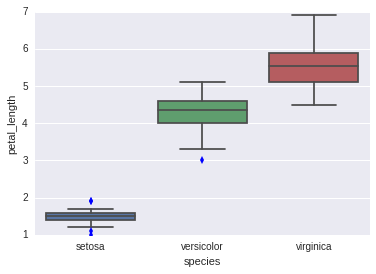

In [90]:
boxplot( x='species', y='petal_length', data=data )

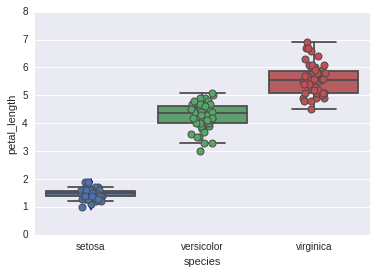

In [89]:
ax = boxplot( x='species', y='petal_length', data=data )
ax = stripplot( x='species', y='petal_length', data=data, jitter=True, edgecolor='gray' )

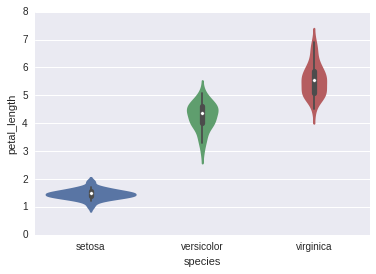

In [93]:
violinplot( x='species', y='petal_length', data=data, size=6 )

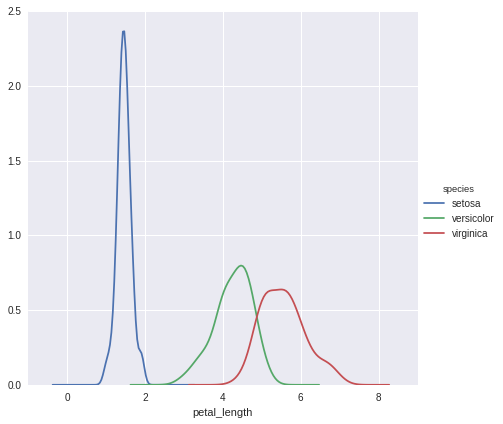

In [95]:
grid = FacetGrid( data, hue='species', size=6 )
grid.map( kdeplot, 'petal_length' ).add_legend()

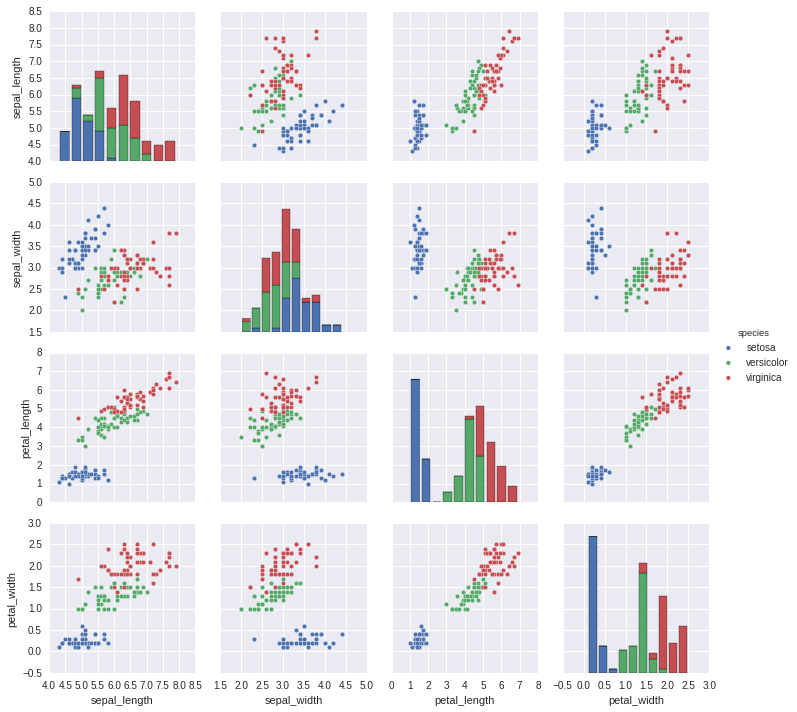

In [96]:
from warnings import filterwarnings
filterwarnings('ignore')
pairplot( data, size=2.5, hue='species' )

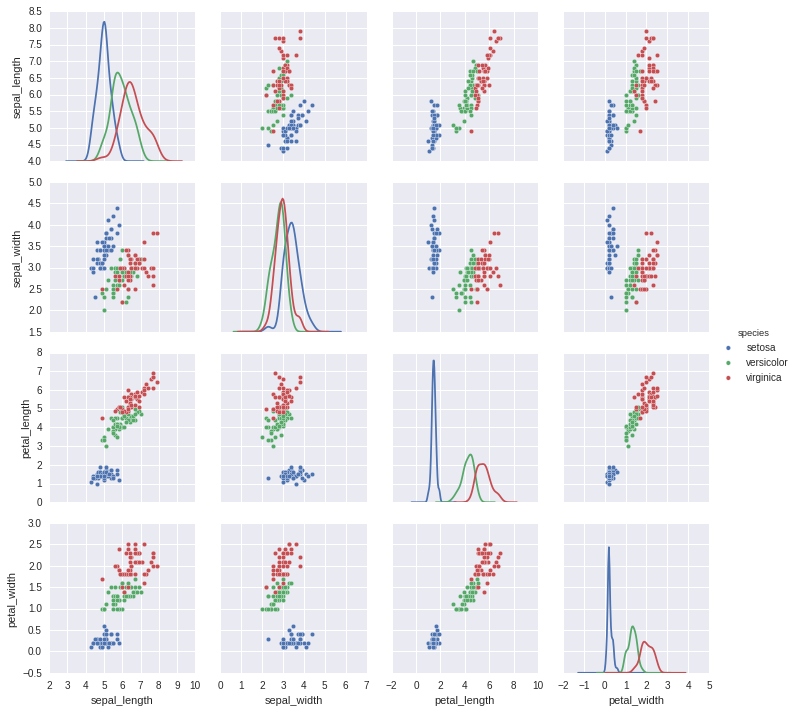

In [100]:
pairplot( data, size=2.5, hue='species', diag_kind='kde' )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae12ff11d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fae12c2d5c0>]], dtype=object)

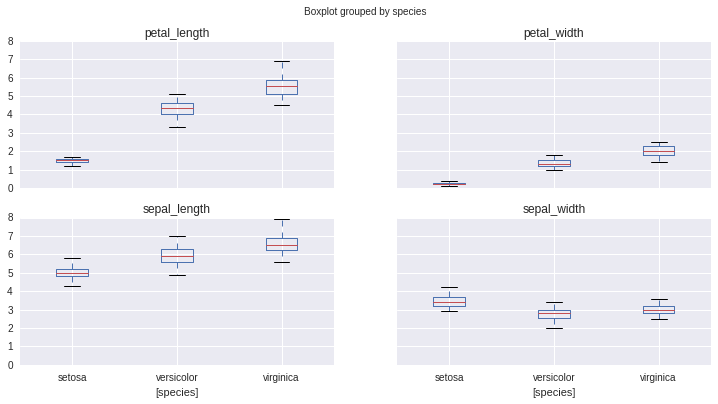

In [101]:
data.boxplot( by='species', figsize=( 12, 6 ))

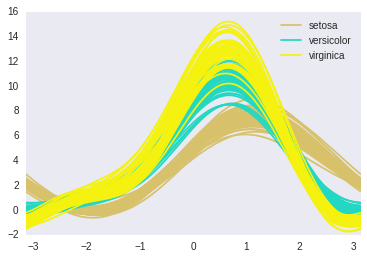

In [104]:
# Andrews Curves involve using attributes of samples as 
# Coefficients for Fourier series
from pandas.tools.plotting import andrews_curves
andrews_curves( data, 'species' )

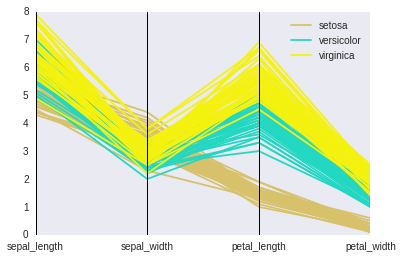

In [105]:
# Parallel coordinates plots each feature on a separate column &
# Then draws lines connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates( data, 'species' )

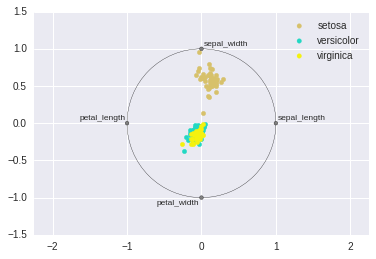

In [106]:
# Radviz puts each feature as a point on a 2D plane, and then
# simulates having each sample attached to those points
# through a spring weighted by the relative value for that feature.
from pandas.tools.plotting import radviz
radviz( data, 'species' )

In [83]:
from pandas import Categorical
from statsmodels.formula.api import ols
import matplotlib.pyplot as pyplot

# Sepal width as a function of petal length and the category of iris
model = ols( 'sepal_width ~ species + petal_length', data ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     46.08
Date:                Sun, 10 Sep 2017   Prob (F-statistic):           5.14e-21
Time:                        02:08:19   Log-Likelihood:                -37.808
No. Observations:                 150   AIC:                             83.62
Df Residuals:                     146   BIC:                             95.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.9919      0.099     30.206      0.000       2.796       3.188
species[T.versicolor]    -1.4927      0.181     -8.264      0.000      -1.850      -1.136
species[T.virginica]     -1.6741      0.255     -6.557      0.000      -2.179      -1.170
petal_length              0.2983      0.060      4.932      0.000       0.179       0.418
==============================================================================
Omnibus:                        3.167   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                3.214
Skew:                          -0.121   Prob(JB):                        0.200
Kurtosis:                       3.675   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Formulate a 'contrast'
# Test if offset for versicolor and virginica are identical
print( model.f_test([ 0, 1, -1, 0 ]))

<F test: F=array([[ 3.26191465]]), p=0.07296614041660565, df_denom=146, df_num=1>
